# I. Exploratory Data Analysis
---------------------------------------
The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15­minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [155]:
#import packages
import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize
from datetime import datetime
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline

# Load json file as a string, 'logins.json'
logins_data = json.load(open('logins.json'))

# Load json file into a Pandas DataFrame
logins_df = pd.read_json('logins.json')

# Set Datetime Index
pd.to_datetime(logins_df['login_time'])
display(logins_df.head())

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


Get info of Login DataFrame:

In [156]:
# Set index to 'login_time'
logins_df = logins_df.set_index(['login_time'])
display(logins_df.head())


""
login_time
1970-01-01 20:13:18
1970-01-01 20:16:10
1970-01-01 20:16:37
1970-01-01 20:16:36
1970-01-01 20:26:21


In [157]:
# Aggregate login counts based on 15-minute time intervals
logins_df['count'] = 1
count_login_15T = logins_df.resample('15T').sum()
display(count_login_15T.head())
# print(count_login_15T.info())

# count_login_15T.describe()


,count
login_time,
1970-01-01 20:00:00,2.0
1970-01-01 20:15:00,6.0
1970-01-01 20:30:00,9.0
1970-01-01 20:45:00,7.0
1970-01-01 21:00:00,1.0


There are 407 missing NaNs

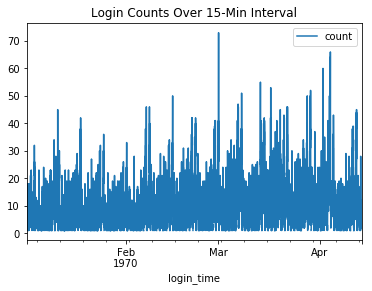

In [158]:
# Visualize time series of login counts
count_login_15T.plot()
plt.title('Login Counts Over 15-Min Interval')

#### Time period: 
January 1 - April 13, 1970

#### Trends:
- Spike in login counts at certain time intervals
- Average count over 15-min interval is 10

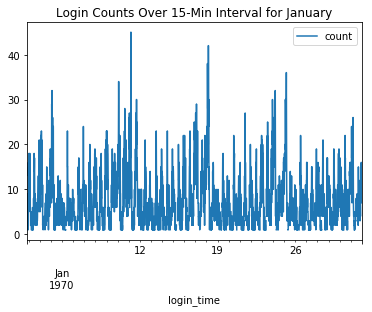

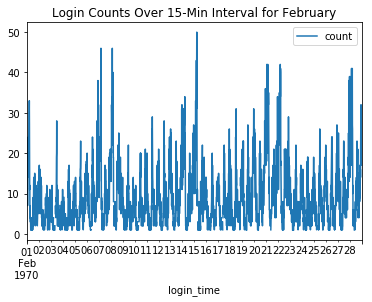

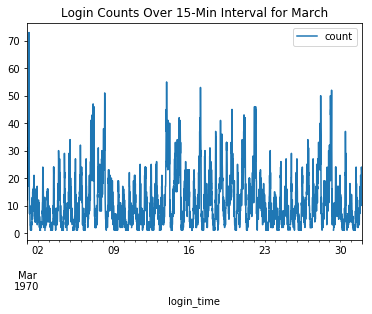

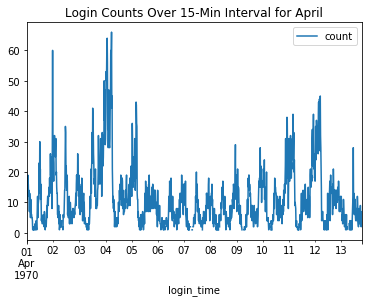

In [159]:
# Aggregate login counts based on 15-minute time intervals for January

jan = count_login_15T.loc['1970-01']
jan.plot()
plt.title('Login Counts Over 15-Min Interval for January')

# Aggregate login counts based on 15-minute time intervals for February

feb = count_login_15T.loc['1970-02']
feb.plot()
plt.title('Login Counts Over 15-Min Interval for February')

# Aggregate login counts based on 15-minute time intervals for March

mar = count_login_15T.loc['1970-03']
mar.plot()
plt.title('Login Counts Over 15-Min Interval for March')

# Aggregate login counts based on 15-minute time intervals for April

apr = count_login_15T.loc['1970-04']
apr.plot()
plt.title('Login Counts Over 15-Min Interval for April')

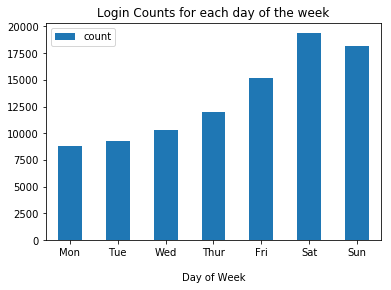

In [160]:
# Aggregate login counts by day from January 1 - April 13
# 0 = Monday, 6 = Sunday
count_login_wkday = count_login_15T.groupby(count_login_15T.index.weekday).sum()
count_login_wkday

# Plot login counts from Mon - Sun
count_login_wkday.plot(kind='bar')
plt.xticks([0,1,2,3,4,5,6],['Mon','Tue', 'Wed','Thur','Fri','Sat','Sun'], rotation = 0)
plt.title('Login Counts for each day of the week')
plt.xlabel('\nDay of Week')

##### Is there more activity during the week or weekend?  
The amount of logins increases each day during the week and is the highest during the weekend.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

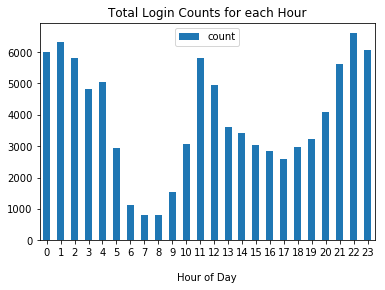

In [161]:
# Aggregate login counts by hour from January 1 - April 13
# 0 = Monday, 6 = Sunday
count_login_hr = count_login_15T.groupby(count_login_15T.index.hour).sum()
count_login_hr

# Plot login counts by hour
count_login_hr.plot(kind='bar')
plt.title('Total Login Counts for each Hour')
plt.xlabel('\nHour of Day')
plt.xticks(rotation = 0)

##### Which hour of the day shows an increase in logins?
The number of logins peak during lunch hour (11 AM - 12 PM) and at night (10 PM - 4 AM)



# II. Experiment and Metric Design
-------------------------------------------------
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two-way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:

    a. how you will implement the experiment

    b. what statistical test(s) you will conduct to verify the significance of the
    observation

    c. how you would interpret the results and provide recommendations to the city
    operations team along with any caveats


A good quantitative metric that we could observe for this experiment is the comparison of the number of times a driver crossed the bridge without a reimbursement and with a reimbursement.

The paired t-test is a great statistical test to detect the difference between the two independent groups (without and with reimbursement).

H0: There is no difference between drivers crossing the bridge without toll reimbursements versus reimbursement for toll costs.

Ha: There is a significant difference between drivers crossing the bridge without toll reimbursements versus reimbursement for toll costs.



# III. Predictive Modeling
------------------------------------
Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long-term rider retention (again, a few sentences will suffice).


Data description:
- city: city this user signed up in
- phone: primary device for this user
- signup_date: date of account registration; in the form ‘YYYY MM DD’
- last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’
- avg_dist: the average distance in miles per trip taken in the first 30 days after signup
- avg_rating_by_driver: the rider’s average rating over all of their trips
- avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
- surge_pct: the percent of trips taken with surge multiplier > 1
- avg_surge: The average surge multiplier over all of this user’s trips
- trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up
- ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise
- weekday_pct: the percent of the user’s trips occurring during a weekday

## 1) Data Wrangling

In [162]:
# Load json file as a string
ultimate_data_file = json.load(open('ultimate_data_challenge.json'))

# Use normalization to create tables from nested element
ultimate_data = json_normalize(ultimate_data_file)

ultimate_data.head()


,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [163]:
# Check DataFrame for missing values 
ultimate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


- 201 missing values in avg_rating_by_driver
- 8122 missing values in avg_rating_of_driver
- 396 missing values in phone

In [164]:
# Fill in NaNs with average 

ultimate_data['avg_rating_by_driver'].fillna(ultimate_data['avg_rating_by_driver'].mean(), inplace=True)
ultimate_data['avg_rating_of_driver'].fillna(ultimate_data['avg_rating_of_driver'].mean(), inplace=True)
ultimate_data['phone'].fillna('iPhone', inplace=True)

ultimate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     50000 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [165]:
# Descriptive statistics for each variable
display(ultimate_data.describe())

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.445753,0.564977,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.500000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.700000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [166]:
# Convert objects to Datetime
ultimate_data['last_trip_date'] = pd.to_datetime(ultimate_data['last_trip_date'])
ultimate_data['signup_date'] = pd.to_datetime(ultimate_data['signup_date'])

# Print range of dates of when users were observed
print('min:', ultimate_data['last_trip_date'].min())
print('max:', ultimate_data['last_trip_date'].max())


min: 2014-01-01 00:00:00
max: 2014-07-01 00:00:00


In [167]:
# # Extract Month from DataFrame
# ultimate_data['last_trip_date_month'] = ultimate_data['last_trip_date'].dt.month
# display(ultimate_data.head())

## 2) EDA of Ultimate Users

In [168]:
# Count active users and store in column, 'active_user'
ultimate_data['active_user'] = ultimate_data['last_trip_date'] >= '2014-06-01'
active_users = (ultimate_data['last_trip_date'] >= '2014-06-01').sum()
display(active_users)

print("Percent of retained users: " , (active_users/len(ultimate_data['last_trip_date'])))

18804

Percent of retained users:  0.37608


An "active" user means having taken a trip in the previous 30 days as of July 2014.  Approximately 38% of users are retained at 6 months.

In [169]:
display(ultimate_data.head())

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active_user
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,True
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,False
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,False
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,True
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,False


#### Create a balance between active and inactive users (Class Imbalance)

In [170]:
# Create DataFrame for Inactive users
inactive_users = ultimate_data.loc[ultimate_data.active_user == False]

# Randomly sample 18804 inactive users
inactive_users = inactive_users.sample(n=18804, random_state=21)
# display(inactive_users.head())

# Create DataFrame for active users
active_users = ultimate_data.loc[ultimate_data.active_user == True]
# display(active_users)

# Join inactive_users with active_users
test_data = pd.concat([active_users, inactive_users])
display(test_data)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active_user
0,3.67,5.0,4.700000,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,True
3,2.36,4.9,4.600000,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,True
5,10.56,5.0,3.500000,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,True,100.0,True
13,3.04,5.0,4.000000,1.38,King's Landing,2014-06-08,iPhone,2014-01-29,50.0,0,False,50.0,True
16,10.86,3.0,5.000000,1.00,King's Landing,2014-06-28,Android,2014-01-11,0.0,1,True,50.0,True
17,2.38,4.8,3.900000,1.00,King's Landing,2014-07-01,iPhone,2014-01-12,0.0,0,True,95.2,True
18,6.83,4.8,4.600000,1.21,King's Landing,2014-06-24,iPhone,2014-01-28,30.8,6,True,80.8,True
19,12.08,5.0,5.000000,1.17,King's Landing,2014-06-03,iPhone,2014-01-02,33.3,0,False,66.7,True
23,7.74,5.0,5.000000,1.00,King's Landing,2014-06-13,Android,2014-01-21,0.0,0,True,100.0,True
28,5.97,5.0,4.601559,1.50,Winterfell,2014-06-08,iPhone,2014-01-19,100.0,0,False,0.0,True


city
Astapor           4228.0
King's Landing    6363.0
Winterfell        8213.0
Name: active_user, dtype: float64

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

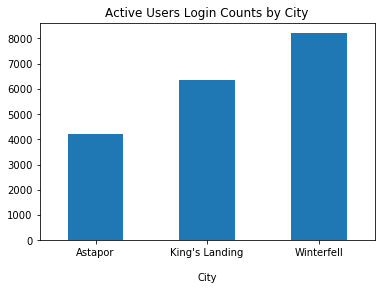

In [171]:
# Count active users by city
active_users_city = (ultimate_data['active_user'] == True).groupby(ultimate_data['city']).sum().sort_values(ascending = True)
display(active_users_city)

# Plot active users by city
active_users_city.plot(kind='bar')
plt.title('Active Users Login Counts by City')
plt.xlabel('\nCity')
plt.xticks(rotation = 0)

More activity in Winterfell.

phone
Android     3146.0
iPhone     15658.0
Name: active_user, dtype: float64

(array([0, 1]), <a list of 2 Text xticklabel objects>)

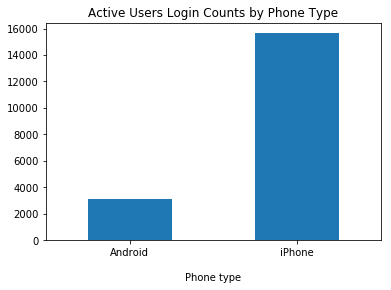

In [172]:
# Count active users by phone type (iphone or android)
active_users_phone= (ultimate_data['active_user'] == True).groupby(ultimate_data['phone']).sum()
display(active_users_phone)

# Plot active users by phone type
active_users_phone.plot(kind='bar')
plt.title('Active Users Login Counts by Phone Type')
plt.xlabel('\nPhone type')
plt.xticks(rotation = 0)

83% of active users are using an iphone.


## 3) Models
-----------------
The classification goal is to predict whether or not a user will be active in their 6th month on the system.

### Logistic Regression:

1) Creating Dummy Variables for Feature Selection

In [173]:
# Dummify all columns with categorical features 
dummy_cols_convert = pd.get_dummies(test_data, columns = ['city', 'phone', 'ultimate_black_user'], drop_first=True)

# Drop 'last_trip_date' column
dummy_cols_convert = dummy_cols_convert.drop(['last_trip_date','signup_date'], axis=1)

display(dummy_cols_convert.head())
                                  

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,active_user,city_King's Landing,city_Winterfell,phone_iPhone,ultimate_black_user_True
0,3.67,5.0,4.7,1.10,15.4,4,46.2,True,1,0,1,1
3,2.36,4.9,4.6,1.14,20.0,9,80.0,True,1,0,1,1
5,10.56,5.0,3.5,1.00,0.0,2,100.0,True,0,1,1,1
13,3.04,5.0,4.0,1.38,50.0,0,50.0,True,1,0,1,0
16,10.86,3.0,5.0,1.00,0.0,1,50.0,True,1,0,0,1


2) Feature Selection using Dummy Variables

In [174]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Instantiate a Logistic Regression Classifier (logreg)
logreg = LogisticRegression()

# Choose X = feature and Y = target
Y = dummy_cols_convert['active_user']
X_all = dummy_cols_convert.drop('active_user', axis=1)

# RFE to help find most important features
rfe = RFE(logreg, 3)
rfe = rfe.fit(X_all, Y)
print(rfe.support_) # support returns boolean with top 3 features
print(rfe.ranking_) # ranking returns an integer with 1 being a top feature

# Get column names (features) from DataFrame, dummy_cols_convert
col_names = X_all.columns.values

# Print best feature names
best_features_raw = rfe.support_ * col_names
# print(best_features_raw)

# Create list with best feature names
best_features = []

for best_feature in best_features_raw:
    if len(best_feature) > 0:
        best_features.append(best_feature)
        
print('Best Predictors for Retention: {}'.format(best_features))

[False False False False False False False  True False  True  True]
[7 3 6 4 8 5 9 1 2 1 1]
Best Predictors for Retention: ["city_King's Landing", 'phone_iPhone', 'ultimate_black_user_True']


3) Logit model to test which features are significant

In [175]:
import statsmodels.api as sm
from pandas.core import datetools

# Choose X = feature and Y = target using only selected features
X = X_all[best_features]

# Creating a summary table
logit_model = sm.Logit(Y, X)
result = logit_model.fit()
display(result.summary())

Optimization terminated successfully.
         Current function value: 0.661842
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            active_user   No. Observations:                37608
Model:                          Logit   Df Residuals:                    37605
Method:                           MLE   Df Model:                            2
Date:                Fri, 26 Jan 2018   Pseudo R-squ.:                 0.04516
Time:                        22:17:39   Log-Likelihood:                -24891.
converged:                       True   LL-Null:                       -26068.
                                        LLR p-value:                     0.000
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
city_King's Landing          0.9258      0.027     34.563      0.000       0.873       0.978
phone_iPhone                -0.0582      0.016     -3.661      0.000      -0.089      -0.027
ultimate_black_user_True     0.3554      0.021     17.142      0.000       0.315       0.396
============================================================================================
"""

3) Hyperparamter tuning with GridSearchCV

In [176]:
#  Using GridSearchCV for optimizing hyperparameters of logistic regression
from sklearn.model_selection import GridSearchCV

X = X_all[best_features] # same y as above, Y= dummy_cols_convert['active_user']

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}


# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X,Y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))


Tuned Logistic Regression Parameters: {'C': 0.0061054022965853268}
Best score is 0.6674909593703467


4) Using Logistic Regression to predict if users will remain active in their 6th month

In [177]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Splitting into test and training data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

# Model with tuned hyperparameters
logreg = LogisticRegression(C=0.0061054022965853268)

# Training the model
logreg.fit(X_train, Y_train)

# Testing accuracy on the model
print("Accuracy of Logistic Regression on test set: {: .2f}" .format(logreg.score(X_test, Y_test)))
print("Accuracy of Logistic Regression on training set: {: .2f}" .format(logreg.score(X_train, Y_train)))

# Predict Y, 'Active Users'
Y_train_pred = logreg.predict(X_train)
Y_test_pred = logreg.predict(X_test)

# Prediction accuracy
print("Accuracy of Prediction: ", accuracy_score(Y_test, Y_test_pred))

Accuracy of Logistic Regression on test set:  0.67
Accuracy of Logistic Regression on training set:  0.67
Accuracy of Prediction:  0.673686449692


### Performance Evaluation Metrics

1) Confustion Matrix

[[3497 1184]
 [1884 2837]]


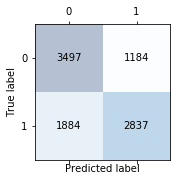

In [178]:
# 1) Confusion Matrix
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(Y_test, Y_test_pred)
print(confmat)

# Graph the confusion matrix
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i,j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

0 = inactive user

1 = active user

2837 out of the 4721 sampled data made a correct prediction of active users.
3497 out of the 4681 sampled data made a correct prediction of inactive users.

2) ROC Curve

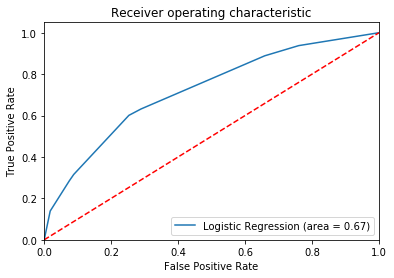

In [179]:
from sklearn.metrics import roc_auc_score, roc_curve

logit_roc_auc = roc_auc_score(Y_test, Y_test_pred)
fpr, tpr, thresholds = roc_curve(Y_test, logreg.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


A good classifier stays as far away from the line as possible (toward 1.0 on the y-axis). 

AUC = 0.67 is the predictive accuracy of the model.  


### Conclusion:
-----------
- Logisitic Regression Model performed better than Random Forest Classifier in predicting best features for retention. 

- Using the best selected features (X), the Logistic Regression model predicts the user will be active in their 6th month correctly 69% of the time.

- The features most correlated to retention are: 
    
    1) The user is signed up in King's Landing
    
    2) Primary device for the user is an Iphone.
    
    3) Whether or not user took an Ultmate Black in their first 30 days
    
### Recommendations:  
- Ultimate can look further into the differences of each city and see what King's Landing has that other cities don't. 
- A majority of Ultimate users are using an iphone. Is it easier to navigate the app with an iphone versus an android. The company can conduct a usability test of Iphone and Android users to test for certain features on the app. 
- Is there a correlation between using an Ultimate Black and being a retained user? 